In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import sys
sys.path.append("../src")

from vidtoseg import r2plus1d, parallel2dconv, simsiam, unet
from data import LabeledDataset, unnormalize

import torch

In [27]:
dataset = LabeledDataset("../Dataset_Student")
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2)

In [ ]:
vid, masks = dataset[0]

x = vid[:11].transpose(0, 1).unsqueeze(0)

print(x.shape)

In [37]:
backbone = r2plus1d.R2Plus1DNet()
output = backbone(x)

print(output.shape)
print(sum(p.numel() for p in backbone.parameters() if p.requires_grad))
del backbone

torch.Size([1, 3, 11, 256, 256])
torch.Size([1, 256, 2, 16, 16])
13023527


Sizes of each layer output
```
torch.Size([1, 3, 11, 256, 256])
torch.Size([1, 32, 11, 128, 128])
torch.Size([1, 32, 11, 128, 128])
torch.Size([1, 64, 6, 64, 64])
torch.Size([1, 128, 3, 32, 32])
torch.Size([1, 256, 2, 16, 16])
```

In [39]:
vid, masks = dataset[0]

x = vid[:11].transpose(0, 1).unsqueeze(0)
print(x.shape)

backbone = parallel2dconv.Parallel2DResNet()
output = backbone(x)

print(output.shape)
print(sum(p.numel() for p in backbone.parameters() if p.requires_grad))
del backbone

torch.Size([1, 3, 11, 256, 256])
torch.Size([1, 256, 11, 16, 16])
4368512


In [45]:
ssl_model = simsiam.SimSiamGSTA(parallel2dconv.Parallel2DResNet)
print(sum(p.numel() for p in ssl_model.parameters() if p.requires_grad))
del ssl_model

10798210


In [61]:
model = unet.UNetVidToSeg(parallel2dconv.Parallel2DResNet())
print(sum(p.numel() for p in model.parameters() if p.requires_grad))
res = model(x1)
del model

10584529
torch.Size([2, 32, 128, 128])
torch.Size([2, 32, 128, 128])
torch.Size([2, 64, 64, 64])
torch.Size([2, 128, 32, 32])
torch.Size([2, 256, 16, 16])
torch.Size([2, 256, 11, 16, 16])
Up block 0:
torch.Size([2, 256, 16, 16])
torch.Size([2, 128, 32, 32])
Up block 1:
torch.Size([2, 128, 32, 32])
torch.Size([2, 64, 64, 64])
Up block 2:
torch.Size([2, 64, 64, 64])
torch.Size([2, 32, 128, 128])
Up block 3:
torch.Size([2, 64, 128, 128])
torch.Size([2, 32, 128, 128])


In [62]:
print(res.shape)

torch.Size([2, 49, 160, 240])


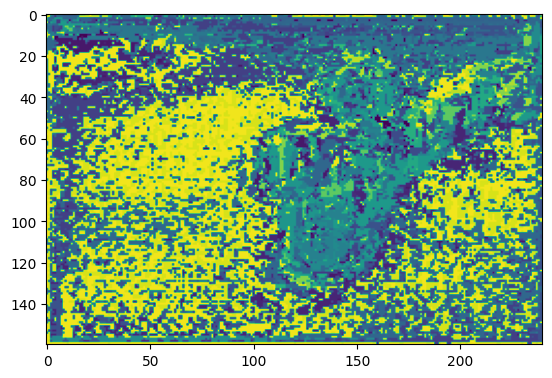

In [64]:
import matplotlib.pyplot as plt

plt.imshow(torch.argmax(res[0], dim=0))

torch.Size([1, 3, 11, 256, 256])
torch.Size([11, 3, 256, 256])


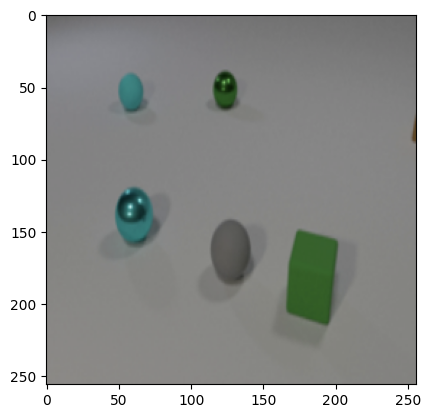

In [65]:
print(x.shape)
image = unnormalize(x[0].transpose(0, 1))
print(image.shape)
plt.imshow(image.movedim(1, -1)[0])